# Introduzione a Tensorflow 2.x

Tensorflow è la libreria messa a disposizione da Google che abilita a al machine learning. 
Di solito viene utilizzata con python anche se è disponibile in altri linguaggi.

Iniziamo ora ad eseguire alcune righe di codice per carpirne il suo funzionamento

In [1]:
import tensorflow as tf
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution is: {}".format(tf.executing_eagerly()))
print("Keras version: {}".format(tf.keras.__version__))

#per il nostro lavoro è importante che la versione sia la 2.5

TensorFlow version: 2.5.0
Eager execution is: True
Keras version: 2.5.0


In [2]:
if tf.test.gpu_device_name(): 
  print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
  print("Please install GPU version of TF")

Please install GPU version of TF


## Tensori

Abbiamo visto nelle discussioni precedenti cosa è un tensore ma per completezza della lezione ripetiamo il concetto.
Un tensore è una generalizzazione dei vettori e delle matrici, come potrete immaginare tensorflow è una libreria che permette di lavorare con tensori a n dimensioni.

Un tensore è rappresentato da due parametri:

* Il DataType che specifica il tipo dei valori in esso contenuti ad esempio float32, int32, string
* Lo Shape che specifica le dimensioni del dato

Tutti i tensori sono immutabili, nel senso che una volta creati non possono essere modificati al massimo se ne può creare uno nuovo con il valore voluto cominciamo con il creare un valore "scalare" con rank pari a 0

In [3]:
rank_0_tensor = tf.constant(4)
print(rank_0_tensor)

tf.Tensor(4, shape=(), dtype=int32)


Creiamo un vettore con "rank" pari a 1

In [4]:
rank_1_tensor = tf.constant([2.0, 3.0, 4.0])
print(rank_1_tensor)

tf.Tensor([2. 3. 4.], shape=(3,), dtype=float32)


ed una matrice con rank (rango) pari a 2

In [5]:
rank_2_tensor = tf.constant([[1, 2],
                             [3, 4],
                             [5, 6]], dtype=tf.float16)
print(rank_2_tensor)

tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float16)


In [7]:
tf.rank(rank_2_tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

## Variabili

Le variabili sono il corpo principale di tensorflow utilizzato nella ottimizzazione dei modelli.
Una variabile viene creata e tracciata attraverso la classe `tf.Variable`

In [8]:
# tf.debugging.set_log_device_placement(True)

my_tensor = tf.constant([[1.0, 2.0], [3.0, 4.0]])
my_variable = tf.Variable(my_tensor)

# Variables can be all kinds of types, just like tensors
bool_variable = tf.Variable([False, False, False, True])
complex_variable = tf.Variable([5 + 4j, 6 + 1j])

come i tensori anche le variabili supportano le proprietà `shape` e `dtype`

In [9]:
print("Shape: ", my_variable.shape)
print("DType: ", my_variable.dtype)
print("As NumPy: ", my_variable.numpy())

Shape:  (2, 2)
DType:  <dtype: 'float32'>
As NumPy:  [[1. 2.]
 [3. 4.]]


e le operazioni valide per i tensori sono valide anche per le variabili ad esempio

In [10]:
print("A variable:", my_variable)
print("\nViewed as a tensor:", tf.convert_to_tensor(my_variable))
print("\nIndex of highest value:", tf.argmax(my_variable))

# This creates a new tensor; it does not reshape the variable.
print("\nCopying and reshaping: ", tf.reshape(my_variable, [1,4]))

A variable: <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>

Viewed as a tensor: tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)

Index of highest value: tf.Tensor([1 1], shape=(2,), dtype=int64)

Copying and reshaping:  tf.Tensor([[1. 2. 3. 4.]], shape=(1, 4), dtype=float32)


In [12]:
rank_2_tensor.shape

TensorShape([3, 2])

## Reshape 

Questa operazione consente di cambiare la dimensione di un tensore

In [13]:
tensor1 = tf.ones([1,2,3])  # tf.ones() creates a shape [1,2,3] tensor full of ones
tensor2 = tf.reshape(tensor1, [2,3,1])  # reshape existing data to shape [2,3,1]
tensor3 = tf.reshape(tensor2, [3, -1])  # -1 tells the tensor to calculate the size of the dimension in that place
                                        # this will reshape the tensor to [3,3]
                                                                             
# The numer of elements in the reshaped tensor MUST match the number in the original

In [14]:
print(tensor1)
print(tensor2)
print(tensor3)

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)
tf.Tensor(
[[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]], shape=(2, 3, 1), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


## Slicing

Questa operazione è la stessa vista in numpy

In [15]:
# Creating a 2D tensor
matrix = [[1,2,3,4,5],
          [6,7,8,9,10],
          [11,12,13,14,15],
          [16,17,18,19,20]]

tensor = tf.Variable(matrix, dtype=tf.int32) 
print(tf.rank(tensor))
print(tensor.shape)

tf.Tensor(2, shape=(), dtype=int32)
(4, 5)


In [17]:
# Now lets select some different rows and columns from our tensor

three = tensor[0,2]  # selects the 3rd element from the 1st row
print(three)  # -> 3

row1 = tensor[0]  # selects the first row
print(row1)

column1 = tensor[:, 0]  # selects the first column
print(column1)

row_2_and_4 = tensor[1::2]  # selects second and fourth row
print(row_2_and_4)

column_1_in_row_2_and_3 = tensor[1:3, 0]
print(column_1_in_row_2_and_3)

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)
tf.Tensor([ 1  6 11 16], shape=(4,), dtype=int32)
tf.Tensor(
[[ 6  7  8  9 10]
 [16 17 18 19 20]], shape=(2, 5), dtype=int32)
tf.Tensor([ 6 11], shape=(2,), dtype=int32)


## Creiamo la nostra prima rete neuronale

come prima cosa andiamo ad utilizzare una libreria Keras che essenzialmente ha come scopo quello di semplificare lo sviluppo delle reti neuronali, poi andremo ad utilizzare un dataset giocattolo 

In [18]:
from tensorflow import keras

In [19]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

4423680/4422102 [==============================] - 4s 1us/step


controlliamo la dimensione del dataset di trainig e di test

In [20]:
train_images.shape

(60000, 28, 28)

In [21]:
test_images.shape

(10000, 28, 28)

in base a quanto visto prima andiamo ad analizzare il valore delle etichette

In [22]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

vediamo una immagine per curiosità

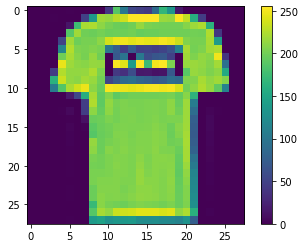

In [24]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

## Preprocessamento dei dati

Come prima cosa andiamo a normalizzare i dati presenti nel dataset affinchè i valori siano compresi tra 0 e 1

In [25]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Creazione del modello

E' giunto il momento di creare il nostro primo modello, utilizziamo il sistema più semplice messo a disposizione da keras

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

### Compilazione del modello 

Una volta definito il modello va specificato l'ottimizzazione una funzione loss 

In [27]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train del modello

una volta compilato il modello possiamo passare alla fase di training

In [28]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 918us/step - loss: 0.4993 - accuracy: 0.8246
Epoch 2/10
1875/1875 [==============================] - 2s 875us/step - loss: 0.3769 - accuracy: 0.8642
Epoch 3/10
1875/1875 [==============================] - 2s 857us/step - loss: 0.3386 - accuracy: 0.8760
Epoch 4/10
1875/1875 [==============================] - 2s 909us/step - loss: 0.3153 - accuracy: 0.8834
Epoch 5/10
1875/1875 [==============================] - 2s 813us/step - loss: 0.2961 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 2s 819us/step - loss: 0.2813 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 2s 898us/step - loss: 0.2699 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 2s 870us/step - loss: 0.2580 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 2s 812us/step - loss: 0.2476 - accuracy: 0.9086
Epoch 10/10
1875/1875 [==============================] - 2s 829u

In [29]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 678us/step - loss: 0.3314 - accuracy: 0.8838
Test accuracy: 0.8838000297546387


In [30]:
predictions = model.predict(test_images)

In [35]:
predictions[1]

array([7.5675034e-06, 1.4708026e-12, 9.9912459e-01, 2.5001498e-12,
       7.7842962e-04, 3.6197243e-11, 8.9424553e-05, 7.0633469e-16,
       3.8475765e-09, 8.0715199e-16], dtype=float32)

In [36]:
import numpy as np
np.argmax(predictions[1])

2

Pick a number: 12


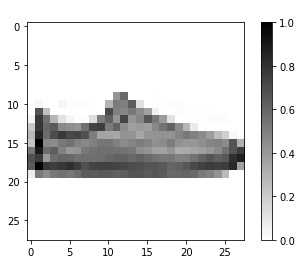

In [37]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
